# demo 线性回归案例应用

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.preprocessing as sp

In [17]:
# x = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
# y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])
data = pd.read_csv("Salary_Data.csv")
x, y = data['YearsExperience'], data['Salary']

In [18]:
lrate = 0.001 #这个值是学习率，0.5造成了梯度爆炸
w0 = 1
w1 = 1
times = 1000#迭代次数
w0s, w1s, losses, epoches = [], [], [], []
for i in range(times):
    #输出梯度下降过程中的参数变化过程
    loss = 1/2 * ((w0 + w1 * x - y)**2).sum()
#     print('{:4}: w0:{:.8f}, w1:{:.8f}, loss:{:.8f}'.format(i+1, w0, w1, loss))
    
    w0s.append(w0)
    w1s.append(w1)
    losses.append(loss)
    epoches.append(i+1)
    
    d0 = (w0 + w1*x - y).sum()
    d1 = (x * (w0 + w1*x - y)).sum()
    w0 = w0 - lrate * d0
    w1 = w1 - lrate * d1
w0, w1

(25751.17531593895, 9456.0502422983)

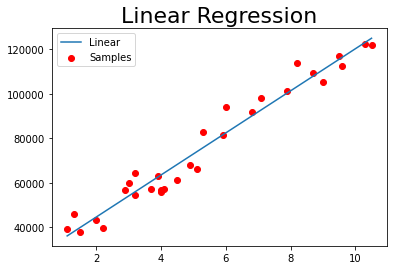

In [19]:
plty = w0 + w1 * x
plt.title('Linear Regression', fontsize = 22)
plt.scatter(x,y,color='red',label='Samples')
plt.plot(x, plty, label='Linear')
plt.legend()
plt.show()

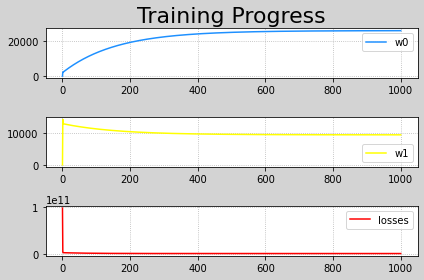

In [20]:
plt.figure('Training Progress', facecolor='lightgray')
plt.subplot(3,1,1)
plt.title('Training Progress', fontsize = 22)
plt.grid(linestyle = ':')
plt.plot(epoches, w0s, color = 'dodgerblue', label = 'w0')
plt.legend()

plt.subplot(3,1,2)
# plt.title('Training Progress', fontsize = 22)
plt.grid(linestyle = ':')
plt.plot(epoches, w1s, color = 'yellow', label = 'w1')
plt.legend()

plt.subplot(3,1,3)
# plt.title('Training Progress', fontsize = 22)
plt.grid(linestyle = ':')
plt.plot(epoches, losses, color = 'red', label = 'losses')
plt.legend()

plt.tight_layout() #重新整理布局（紧凑布局）
plt.show()

In [21]:
print(25751.17531593895 + 9456.0502422983 * 7.5)

96671.5521331762


In [22]:
print(w0 + w1 * 7.5)

96671.5521331762


# 基于sklearn提供的线性回归模型api去预测薪资

In [23]:
import sklearn.linear_model as lm
data = pd.read_csv("Salary_Data.csv")
x, y = data.loc[:, :'YearsExperience'], data['Salary']
model = lm.LinearRegression()
model.fit(x, y)
predict_y = model.predict(x)
#用api预测x=7.5时的y值
print(model.predict([[7.5]]))

[96666.91760958]


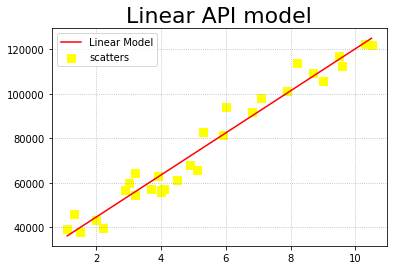

In [24]:
plt.title('Linear API model', fontsize=22)
plt.grid(linestyle = ':')
plt.scatter(x.values.ravel(), y, s=80, marker = 's', color = 'yellow', label = 'scatters')
plt.plot(x.values.ravel(), predict_y, color = 'red', label = 'Linear Model')
plt.legend()
plt.show()

# 评估训练结果误差

In [30]:
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [31]:
test_data = data.loc[::4]
text_x, text_y = test_data.loc[:, :'YearsExperience'], test_data['Salary']
model.fit(test_x, text_y)
pred_test_y = model.predict(text_x)
pred_test_y

array([ 35110.52067291,  45548.40159556,  55037.38425251,  62628.57037808,
        73066.45130073,  89197.72181755, 107226.78886576, 122409.16111689])

In [35]:
#评估模型误差
import sklearn.metrics as sm
result_MAE = sm.mean_absolute_error(text_y, pred_test_y)
print(result_MAE)
#评估模型的r2得分
sr2_score = sm.r2_score(text_y, pred_test_y)
print(sr2_score)

4596.146097814777
0.9655670917384283


# 模型的保存与加载

In [36]:
import pickle
with open('存模型.pkl','wb') as f:
    pickle.dump(model, f)
print('存模型成功')

存模型成功


In [45]:
with open('存模型.pkl','rb') as f:
    model2 = pickle.load(f)
print(model2.predict([[7.5],[2.8]]))

[95840.00967742 51241.79118973]
